# 一 LinearRegression 线性回归

## 1 线性回归

线性模型(linear model) 试图学得一个通过属性的线性组合来进行预测的函数

- 公式：

$$    
h(\theta)=\sum_{j=0}^{n} \theta_{j} x_{j}
$$

- 损失函数：

$$    
J(\theta)=\frac{1}{2m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right)^{2}
$$

- 梯度：

$$
\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}x^{T}(h_{\theta}-y)
$$

- sklearn

输出参数w： [[1.4474774]]
输出参数b： [0.22557542]
预测结果： [[ 4.56800761]
 [ 7.46296241]
 [10.35791721]]


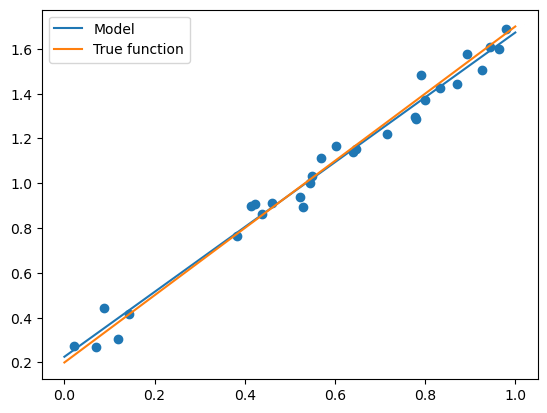

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression # 导入线性回归模型

def true_fun(X): # 这是我们设定的真实函数，即ground truth的模型
    return 1.5*X + 0.2

np.random.seed(0) # 设置随机种子
n_samples = 30 # 设置采样数据点的个数

'''生成随机数据作为训练集，并且加一些噪声'''
X_train = np.sort(np.random.rand(n_samples)) 
y_train = (true_fun(X_train) + np.random.randn(n_samples) * 0.05).reshape(n_samples,1)

'''使用sklearn中的线性回归模型进行训练'''
model = LinearRegression() # 定义模型
model.fit(X_train[:,np.newaxis], y_train) # 训练模型
print("输出参数w：",model.coef_) # 输出模型参数w
print("输出参数b：",model.intercept_) # 输出参数b

X_test = [[3], [5], [7]]
y_pred = model.predict(X_test)
print("预测结果：",y_pred)

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X_train,y_train) # 画出训练集的点
plt.legend(loc="best")
plt.show()

- numpy

输出参数w: [1.445439]
输出参数:b [0.22683262]


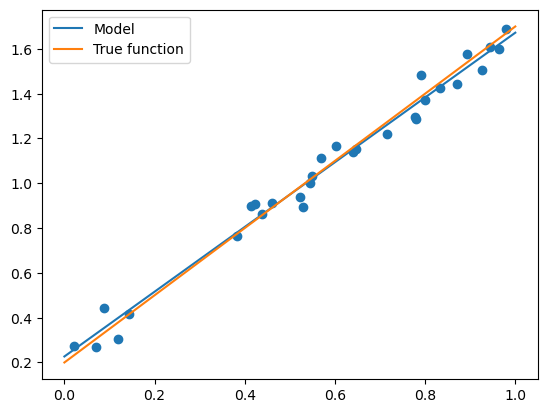

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def true_fun(X):
    return 1.5*X + 0.2

np.random.seed(0) # 随机种子
n_samples = 30
'''生成随机数据作为训练集'''
X_train = np.sort(np.random.rand(n_samples)) 
y_train = (true_fun(X_train) + np.random.randn(n_samples) * 0.05).reshape(n_samples,1)
data_X = []
for x in X_train:
    data_X.append([1,x])
data_X = np.array((data_X))

m,p = np.shape(data_X) # m, 数据量 p: 特征数
max_iter = 1000 # 迭代数
weights = np.ones((p,1))  
alpha = 0.1 # 学习率
for i in range(0,max_iter):
    error = np.dot(data_X,weights)- y_train
    gradient = data_X.transpose().dot(error)/m
    weights = weights - alpha * gradient
print("输出参数w:",weights[1:][0]) # 输出模型参数w
print("输出参数:b",weights[0]) # 输出参数b

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, X_test*weights[1][0]+weights[0][0], label="Model") 
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X_train,y_train) # 画出训练集的点
plt.legend(loc="best")
plt.show()

## 2 多项式回归

多项式回归的思路一般是将$m$次多项式方程转化为$m$线性回归方程，即将$y=b_0+b_1*x+...+b_m*x^m$转换为$y=b_0*+b_1*x_1+...+b_m*x_m$（令$x_m=x^m$即可），然后使用线性回归的方法求出相应的参数。
一般实际的算法也是如此，我们将多项式特征分析器和线性回归串联，算出线性回归的参数之后倒推过去就行。

- sklearn

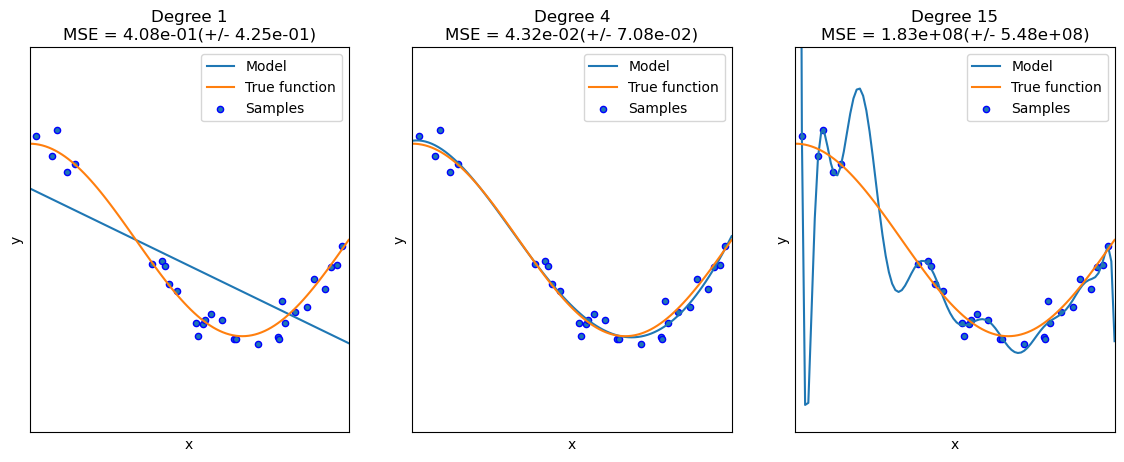

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # 导入能够计算多项式特征的类
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X): # 这是我们设定的真实函数，即ground truth的模型
    return np.cos(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 30 # 设置随机种子

X = np.sort(np.random.rand(n_samples)) 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

degrees = [1, 4, 15] # 多项式最高次
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)]) # 使用pipline串联模型
    pipeline.fit(X[:, np.newaxis], y)
    
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,scoring="neg_mean_squared_error", cv=10) # 使用交叉验证
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()